In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: Select Stocks For Inclusion in Portfolio
selected_stocks = [
    "AMZN",
    "AAPL",
    "PG",
    "T",
    "SBUX",
    "TSLA",
    "MSFT",
    "GOOG",  
    "HAL",
    "VZ",
    "SIRI"
]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: AAPL
[2] Retrieving Stock Data: PG
[3] Retrieving Stock Data: T
[4] Retrieving Stock Data: SBUX
[5] Retrieving Stock Data: TSLA
[6] Retrieving Stock Data: MSFT
[7] Retrieving Stock Data: GOOG
[8] Retrieving Stock Data: HAL
[9] Retrieving Stock Data: VZ
[10] Retrieving Stock Data: SIRI

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AAPL        0.0226
AMZN        0.1359
GOOG        0.2247
HAL         0.0009
MSFT        0.2209
PG          0.0080
Return      0.1596
SBUX        0.0305
SIRI        0.1849
Sharpe      0.3594
T           0.0399
TSLA        0.1128
VZ          0.0188
Variance    0.1714
Name: 38, dtype: float64


In [4]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: AAPL 	Portfolio Weight: 0.0226
                AAPL
Date                
2014-01-03 -0.000502
2014-01-06  0.000123
2014-01-07 -0.000162
2014-01-08  0.000143
2014-01-09 -0.000291

Ticker: AMZN 	Portfolio Weight: 0.1359
                AMZN
Date                
2014-01-03 -0.000523
2014-01-06 -0.000967
2014-01-07  0.001511
2014-01-08  0.001322
2014-01-09 -0.000308

Ticker: GOOG 	Portfolio Weight: 0.2247
                GOOG
Date                
2014-03-28  0.000615
2014-03-31 -0.001215
2014-04-01  0.004074
2014-04-02 -0.000063
2014-04-03  0.001083

Ticker: HAL 	Portfolio Weight: 0.0009
                 HAL
Date                
2014-01-03  0.000002
2014-01-06  0.000003
2014-01-07 -0.000002
2014-01-08 -0.000013
2014-01-09  0.000002

Ticker: MSFT 	Portfolio Weight: 0.2209
                MSFT
Date                
2014-01-03 -0.001491
2014-01-06 -0.004718
2014-01-07  0.001705
2014-01-08 -0.003979
2014-01-09 -0.001425

Ticker: PG 	Portfolio Weight: 0.008
                  PG
Date    

In [5]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                AAPL      AMZN      GOOG       HAL      MSFT        PG  \
Date                                                                     
2014-03-28 -0.000025 -0.000072  0.000615  0.000021  0.005214  0.000011   
2014-03-31 -0.000005 -0.000776 -0.001215 -0.000009  0.003750  0.000084   
2014-04-01  0.000206  0.002651  0.004074  0.000011  0.002305 -0.000026   
2014-04-02  0.000038 -0.000409 -0.000063  0.000005 -0.000374 -0.000021   
2014-04-03 -0.000157 -0.003356  0.001083 -0.000002 -0.001824 -0.000003   

                SBUX      SIRI         T      TSLA        VZ      RTNp  \
Date                                                                     
2014-03-28  0.000124  0.001767  0.000125  0.002715 -0.000107  0.010387   
2014-03-31 -0.000133  0.002619  0.000000 -0.002102  0.000059  0.002273   
2014-04-01  0.000261  0.002297  0.000023  0.004519  0.000071  0.016391   
2014-04-02 -0.000140  0.005620  0.000317  0.006721  0.000028  0.011721   
2014-04-03 -0.000241 -0.003352  0.000

In [6]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,RTNp,RTNm,Excess,Compare
Date,,,,
2014-03-28,0.010387,-0.026811,0.037198,Outperform
2014-03-31,0.002273,0.019605,-0.017331,Underperform
2014-04-01,0.016391,-0.008794,0.025185,Outperform
2014-04-02,0.011721,0.001535,0.010186,Outperform
2014-04-03,-0.009862,-0.007698,-0.002164,Underperform


In [7]:
# [View] Evaluation Sample Size
pfolio_eval.count()

RTNp       1005
RTNm       1005
Excess     1005
Compare    1005
dtype: int64

In [8]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5144
Underperform    0.4856
Name: Compare, dtype: float64

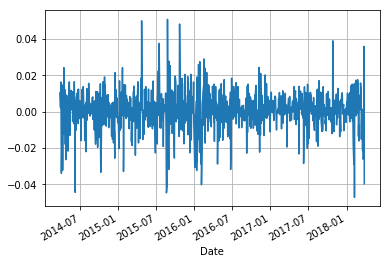

In [9]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(grid=True)

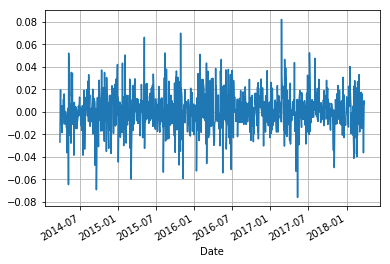

In [10]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(grid=True)